## Tarea 1: Análisis de datos de Unimorph
- Fecha de entrega: martes 5 de octubre.
- Modalidad: crear la carpeta **tarea-1** en su cuenta de github. 
- La tarea es **individual** pero la **discusión grupal es recomendada.**
- Elija una lengua en [datos](https://github.com/orgs/unimorph/repositories). Elija una lengua distinta a la lengua ejemplo (Yanesha)
- En la carpeta "datos", hay archivos para algunas lenguas. Puede elegir otra :)
- **Recomendación:** implemente de forma ordenada y con comentarios. Trate, en lo posible, de poner comentarios en cada línea.
- No duden en preguntar en caso de cualquier problema! :)

## Leemos el archivo
Asumimos que la carpeta tarea-1 tiene adentro dos cosas: archivo de datos (de la lengua elegida) en la carpeta "datos", código en formato ipynb (notebook!). A modo de ejemplo, elegimos **Yanesha** para explicar los pasos de la tarea. 

In [5]:
## archivo en carpeta "datos"
## cat: catalán

import pandas as pd

## noten que especificamos la ruta
## ame
datos = pd.read_csv('cat', sep='\t', header=None)
## puede cambiar estos nombres si lo desea
datos.columns = ['lemas','inflexiones','códigos']

In [6]:
## vamos a trabajar solo con verbos!

datos = datos[datos['códigos'].str.startswith('V')]

In [7]:
## nuestros datos!!! Cada fila indica una forma original, una inflexión del verbo y las coordenadas de la inflexión.

datos

,lemas,inflexiones,códigos
0,abaixar,abaixada,V.PTCP;PST;SG;FEM
1,abaixar,abaixades,V.PTCP;PST;PL;FEM
2,abaixar,abaixant,V.PTCP;PRS
3,abaixar,abaixaran,V;IND;FUT;3;PL
4,abaixar,abaixaràs,V;IND;FUT;2;SG
...,...,...,...
81571,zigzaguejar,zigzaguejàveu,V;IND;PST;2;PL;IPFV
81572,zigzaguejar,zigzagueja,V;IND;PRS;3;SG
81573,zigzaguejar,zigzaguejà,V;IND;PST;3;SG;PFV
81574,zigzaguejar,zigzagueja,V;POS;IMP;2;SG


# Estos son nuestros datos! 3 listas!

In [8]:
## definamos conjuntos de lemas, inflexiones y códigos para cada lengua :)

#### LEMAS ####
## cat
lemas = list(datos['lemas'])

#### INFLEXIONES ####
## cat
inflexiones = list(datos['inflexiones'])

#### CÓDIGOS ####
## cat
codigos = list(datos['códigos'])

In [9]:
datos['lemas']

0            abaixar
1            abaixar
2            abaixar
3            abaixar
4            abaixar
            ...     
81571    zigzaguejar
81572    zigzaguejar
81573    zigzaguejar
81574    zigzaguejar
81575    zigzaguejar
Name: lemas, Length: 81576, dtype: object

In [10]:
datos['inflexiones']

0             abaixada
1            abaixades
2             abaixant
3            abaixaran
4            abaixaràs
             ...      
81571    zigzaguejàveu
81572       zigzagueja
81573       zigzaguejà
81574       zigzagueja
81575       zigzaguejo
Name: inflexiones, Length: 81576, dtype: object

In [11]:
datos['códigos']

0          V.PTCP;PST;SG;FEM
1          V.PTCP;PST;PL;FEM
2                 V.PTCP;PRS
3             V;IND;FUT;3;PL
4             V;IND;FUT;2;SG
                ...         
81571    V;IND;PST;2;PL;IPFV
81572         V;IND;PRS;3;SG
81573     V;IND;PST;3;SG;PFV
81574         V;POS;IMP;2;SG
81575         V;IND;PRS;1;SG
Name: códigos, Length: 81576, dtype: object

## Preguntas

### 1. ¿Cuántos lemas distintos hay?

In [12]:
## Defina la lista lemas_distintos, que guarda los lemas distintos de la lista lemas

lemas_distintos = []
## use un ciclo for para recorrer la lista lemas. Use una condición if!

In [13]:
len(lemas)

81576

In [14]:
lemas_distintos = []

for elemento in lemas:
   
    if elemento not in lemas_distintos:
        lemas_distintos += [elemento]

In [15]:
lemas_distintos[:10]

['abaixar',
 'abandonar',
 'abatre',
 'abdicar',
 'abeurar',
 'abolir',
 'abominar',
 'abraçar',
 'abrandar',
 'abreujar']

In [16]:
len(lemas_distintos)

1547

### 2. ¿Cuántas inflexiones hay por lema distinto?

In [17]:
## Calcule la división entre el número de inflexiones y el número de lemas distintos

inflexiones_por_lema_distinto = 0

In [18]:
len(inflexiones)

81576

In [19]:
inflexiones_unicas = []

for elemento in inflexiones:

    if elemento not in inflexiones_unicas:
        inflexiones_unicas += [elemento]

In [20]:
len(inflexiones_unicas)

62876

In [21]:
len(inflexiones_unicas)/len(lemas_distintos)

40.64382676147382

### 3. Defina la lista tokens_codigos, en que cada código está tokenizado por ";"

In [22]:
tokens_codigos = []
## use un ciclo for para recorrer la lista codigos. En cada iteración, use split(';') y guarde el resultado en tokens_codigos

In [23]:
tokens_codigos = []

In [24]:
for item in codigos:
    lista_codigo_split = item.split (';')
    tokens_codigos += [lista_codigo_split]

In [25]:
tokens_codigos[:5]

[['V.PTCP', 'PST', 'SG', 'FEM'],
 ['V.PTCP', 'PST', 'PL', 'FEM'],
 ['V.PTCP', 'PRS'],
 ['V', 'IND', 'FUT', '3', 'PL'],
 ['V', 'IND', 'FUT', '2', 'SG']]

### 4. ¿Cuál es el número promedio de símbolos usados para describir las inflexiones?

In [26]:
###### tokens_codigos = [['V', 'NO1P', 'FIN', 'REAL'], ['V', 'FIN', 'REAL']]

In [27]:
largo_tokens_codigos = []

for item in tokens_codigos:
    N=len(item)
    largo_tokens_codigos+=[N]

In [28]:
largo_tokens_codigos[:5]

[4, 4, 2, 5, 5]

In [29]:
total_inflexiones = 0

In [30]:
for item in tokens_codigos:
    N=len(item)
    total_inflexiones+=N

In [31]:
total_inflexiones

402054

In [32]:
promedio_símbolos = total_inflexiones/len(tokens_codigos)

## recorra la lista tokens_codigos con un ciclo for. En cada iteración, guarde el largo de la sublista en promedio_inflexiones.
## Finalmente, divida promedio_inflexiones por el largo de tokens_codigos!

In [33]:
total_inflexiones/len(tokens_codigos)

4.928581935863489

In [34]:
promedio_símbolos

4.928581935863489

### 5. Ahora, tokens_codigos es una lista de listas. Defina la lista lista_codigos, que guarda todos los strings usados para describir las inflexiones

In [35]:
lista_codigos = []
## use un ciclo for para recorrer la lista tokens_codigos. En cada iteración, use otro ciclo for, que recorra la sublista, y 
## guarde los strings en lista_codigos

## para resolver este problema, necesito iterar con un ciclo for sobre los elementos de tokens_codigos. Como cada elemento
## es también una lista, podemos recorrerlo con otro ciclo for. 

## este ciclo for recorre los elementos de tokens_codigos
#for item in tokens_codigos: ## 
## este nuevo ciclo for recorre cada 
#    for elemento in item:
#        lista_codigos+=[elemento]

In [36]:
### usamos un primer ciclo for para recorrer la lista tokens_codigos
for items in tokens_codigos:
    ### usamos otro ciclo for para recorrer dentro de cada lista "items" los "elementos"
    for elemento in items:
        ### guardamos 
        lista_codigos += [elemento]

In [37]:
lista_codigos[:5]

['V.PTCP', 'PST', 'SG', 'FEM', 'V.PTCP']

### 6. ¿Cuántos símbolos se utilizan para definir las inflexiones?

In [38]:
## Defina la lista simbolos_distintos, que guarda los simbolos distintos de lista_codigos

simbolos_distintos = []
## use un ciclo for para recorrer la lista lista_codigos. 

In [39]:
for codigo in lista_codigos:
    if codigo not in simbolos_distintos:
        simbolos_distintos += [codigo]

In [40]:
simbolos_distintos

['V.PTCP',
 'PST',
 'SG',
 'FEM',
 'PL',
 'PRS',
 'V',
 'IND',
 'FUT',
 '3',
 '2',
 '1',
 'PFV',
 'COND',
 'NFIN',
 'MASC',
 'IPFV',
 'POS',
 'IMP',
 'SBJV']

### 7. Construya la lista triple_datos en donde cada elemento tiene la forma [lema,inflexión,código]

In [41]:
triple_datos = []

## recorra las listas usando los índices!
#for i in range(len(lemas)):
#    triple = [lemas[i],..]

In [42]:
for i in range (len(lemas)):
    fusion = lemas[i] + " " + inflexiones[i] + " " + codigos[i]
    fusion_split = fusion.split()
    triple_datos += [fusion_split]

In [43]:
triple_datos[:5]

[['abaixar', 'abaixada', 'V.PTCP;PST;SG;FEM'],
 ['abaixar', 'abaixades', 'V.PTCP;PST;PL;FEM'],
 ['abaixar', 'abaixant', 'V.PTCP;PRS'],
 ['abaixar', 'abaixaran', 'V;IND;FUT;3;PL'],
 ['abaixar', 'abaixaràs', 'V;IND;FUT;2;SG']]

### 8. ¿Existen códigos para los cuales el lema es igual a su inflexión? Defina la lista lema_igual_inflexion, que en cada posición pone 1 si son iguales, o 0 en otro caso.

In [44]:
lema_igual_inflexion = []

## recorra la lista triple_datos. En cada interación, use una condición if. 
#for item in triple_datos:

#item = ['achenkateñets','achenkateñets','V;NFIN']

#if item[0]==item[1]:
    

In [45]:
for item in triple_datos:
    
    for i in range(len(item)):
    
        if item[0] == item [1]:
            lema_igual_inflexion += "1"
    
        if item[0] != item[1]: 
            lema_igual_inflexion += "0"

In [46]:
lema_igual_inflexion[:5]

['0', '0', '0', '0', '0']

### 9. Usemos una librería!

In [47]:
!pip install jellyfish

In [48]:
## la distancia de hamming permite calcular la distancia (diferencia) entre strings. Un alto valor de la distancia de Hamming implica que los
## strings son distintos

import jellyfish as JF

JF.hamming_distance("a'chenkateñets","a'chenkateñet")

1

In [49]:
## a partir de la lista triple_datos, construya la lista distancia_largo_codigos, en que cada elemento tiene la forma [JF.hamming_distance(lema,inflexión),largo(codigo)]

#distancia_largo_codigos = []

#item = ['achenkateñets','achenkateñets','V;NFIN']

#distancia_largo_codigos = [[3,8],[0,6]]

In [50]:
distancia_largo_codigos = []

In [51]:
##acceder a la primera lista
for item in triple_datos:
    ##acceder a los elementos de las sublistas
    for i in range(len(item)):
        ### para acceder a lema, inflexión y el largo del código
        distancia_lema_inflexión = [JF.hamming_distance (item[0],item[1])] + [len(item[2])]
        distancia_largo_codigos += [distancia_lema_inflexión]  
       


In [52]:
distancia_largo_codigos[:5]

[[2, 17], [2, 17], [2, 17], [3, 17], [3, 17]]

### 10. Extraiga dos listas de distancia_largo_codigos: distancias y largo_codigos, que guardan las distancias entre lemas e inflexiones, y el largo de los códigos

In [53]:
distancias = []
largo_codigos = []

In [54]:
### Para separar "distancias"
for item in distancia_largo_codigos:
    
    for i in range(len(item)):
    
        solo_distancias = [item[0]]
        distancias += [solo_distancias]
        
       

In [55]:
distancias[:5]

[[2], [2], [2], [2], [2]]

In [56]:
### Para separar "largo_codigos"
for item in distancia_largo_codigos:
    
    for i in range(len(item)):
    
        solo_largo_codigos = [item[1]]
        largo_codigos += [solo_largo_codigos]

In [57]:
largo_codigos[:5]

[[17], [17], [17], [17], [17]]

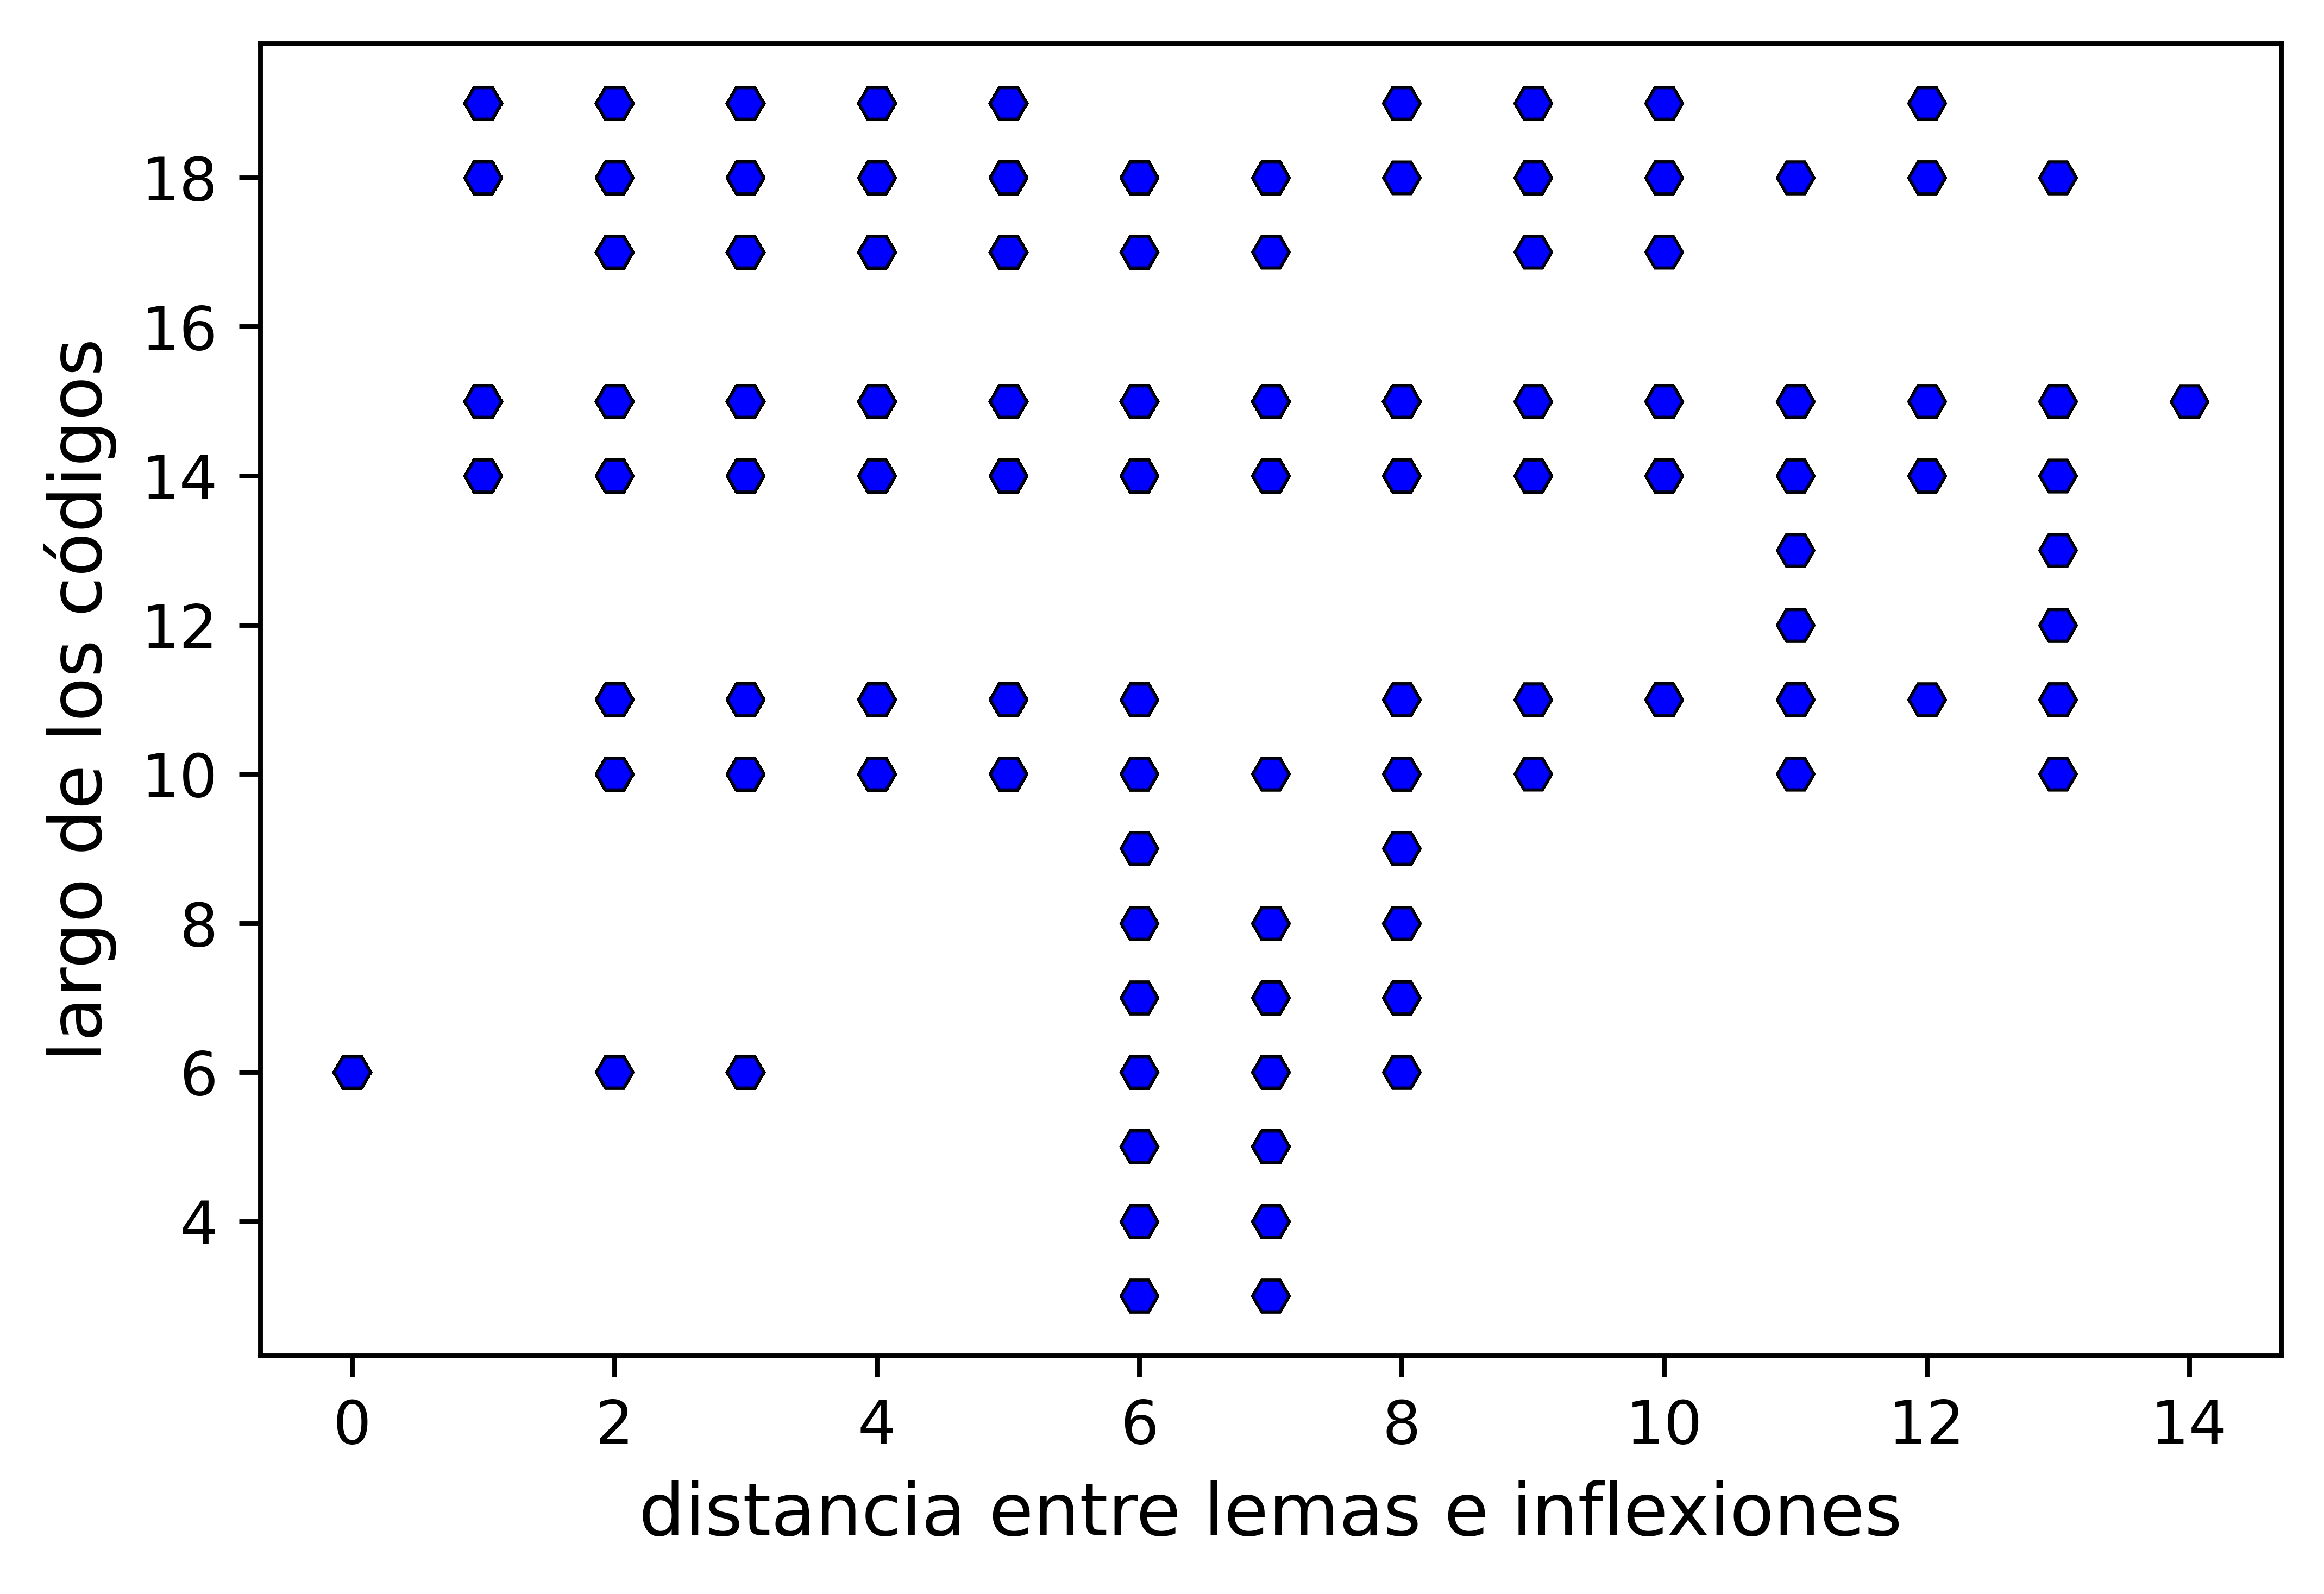

In [59]:
## ejecute el siguiente código!

import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)
    
ax.plot(distancias,largo_codigos,linewidth=0,marker='H',color='blue',markersize=6,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best')
plt.ylabel('largo de los códigos',fontsize=12)
plt.xlabel('distancia entre lemas e inflexiones',fontsize=12)
plt.rcParams.update({'font.size': 10})
plt.savefig('distanciavslargo.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

### 11. Responda las siguientes preguntas. 
- ¿A partir de los cálculos realizados, qué podemos decir sobre la tipología morfológica de la lengua estudiada? Use en su respuesta algo de los cálculos realizados en relación a inflexiones y lemas. Puede explicar los calculos propuestos de manera informal.
- ¿Qué otros cálculos podrían hacerse?

In [62]:
## lengua SVO, flexiva y aglutinante
## ¿cuánta carga gramatical puede tener un lema en catalán?
## La distancia entre lemas e inflexiones tiene a tener entre6 y 8 caracteres
## El largo de los códigos tiende a ser bastante largo, pues en su mayoría no baja de 10 características morfológicas
## Se puede comparar la cantidad de números de códigos por la distancia entre lemas e inflexiones para saber si una lengua es sintética o aislante.
## No hay largos de 16, ¿por qué? 